<a href="https://colab.research.google.com/github/asyraffatha/Task-MachineLearning/blob/main/Week%207/XGBoost_tugasxgboost2_Asyraff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import Library
from google.colab import files
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import shap


In [6]:
# Upload file dataset
uploaded = files.upload()

# Muat ulang himpunan data dengan pembatas yang benar
df = pd.read_csv("tugasxgboost2.csv", delimiter=";")

# Tampilkan beberapa baris pertama dan nama kolom untuk mengonfirmasi data dimuat dengan benar
print("Column names:", df.columns)
df.head()



Saving tugasxgboost2.csv to tugasxgboost2 (1).csv
Column names: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
# Menentukan prediktor (X) dan target (y) berdasarkan nama kolom
predictors = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides']
target = 'quality'

X = df[predictors]  # Features
y = df[target]      # Target


In [8]:
# Membagi data ke dalam set pelatihan dan validasi
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Inisialisasi model XGBoost untuk regresi
model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

In [12]:
# Inisialisasi model XGBoost untuk regresi, menentukan eval_metric dalam konstruktor
model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42, eval_metric="rmse")

# Latih model dengan eval_set untuk melacak kinerja
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)], verbose=True)


[0]	validation_0-rmse:0.82041	validation_1-rmse:0.82645
[1]	validation_0-rmse:0.77886	validation_1-rmse:0.79509
[2]	validation_0-rmse:0.74558	validation_1-rmse:0.77556
[3]	validation_0-rmse:0.72572	validation_1-rmse:0.76575
[4]	validation_0-rmse:0.70638	validation_1-rmse:0.75779
[5]	validation_0-rmse:0.69495	validation_1-rmse:0.75567
[6]	validation_0-rmse:0.68441	validation_1-rmse:0.75295
[7]	validation_0-rmse:0.67625	validation_1-rmse:0.75010
[8]	validation_0-rmse:0.66340	validation_1-rmse:0.74898
[9]	validation_0-rmse:0.65726	validation_1-rmse:0.74946
[10]	validation_0-rmse:0.65382	validation_1-rmse:0.74839
[11]	validation_0-rmse:0.65086	validation_1-rmse:0.74871
[12]	validation_0-rmse:0.64641	validation_1-rmse:0.74637
[13]	validation_0-rmse:0.64502	validation_1-rmse:0.74657
[14]	validation_0-rmse:0.63866	validation_1-rmse:0.74431
[15]	validation_0-rmse:0.63453	validation_1-rmse:0.74345
[16]	validation_0-rmse:0.62668	validation_1-rmse:0.74132
[17]	validation_0-rmse:0.62046	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

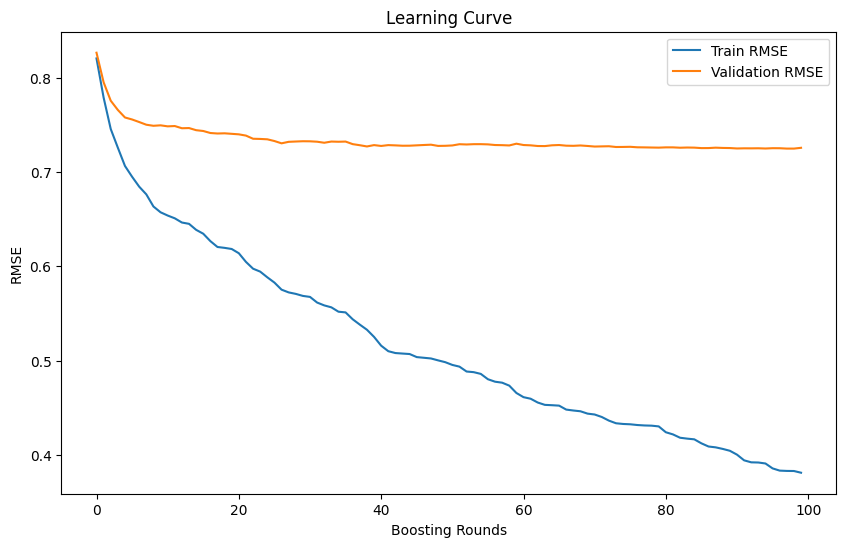

In [14]:
# Mengambil hasil evaluasi
results = model.evals_result()

# Plot Learning Curve
plt.figure(figsize=(10, 6))
plt.plot(results['validation_0']['rmse'], label='Train RMSE')
plt.plot(results['validation_1']['rmse'], label='Validation RMSE')
plt.xlabel('Boosting Rounds')
plt.ylabel('RMSE')
plt.title('Learning Curve')
plt.legend()
plt.show()


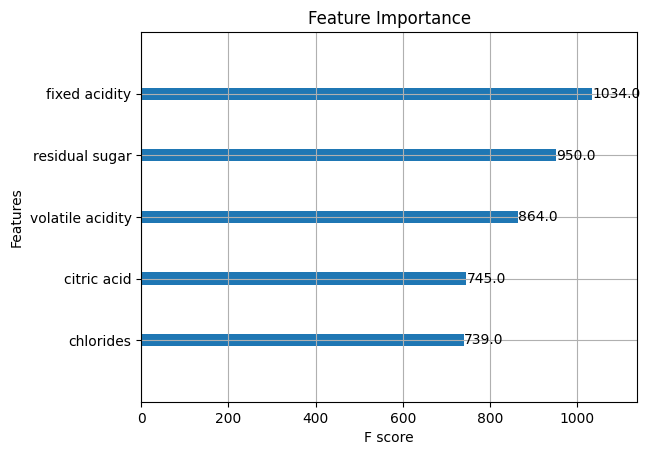

In [15]:
# Plot feature importance
xgb.plot_importance(model, importance_type="weight", max_num_features=10, title="Feature Importance")
plt.show()

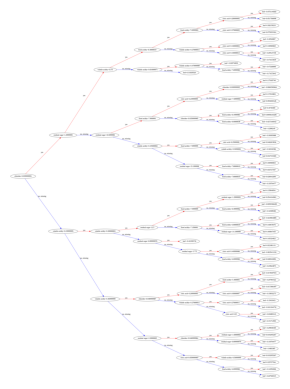

In [16]:
# Plot a single tree from the model
xgb.plot_tree(model, num_trees=0, rankdir='LR')  # View the first tree
plt.show()

In [17]:
# Menginisialisasi penjelasan SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_val)

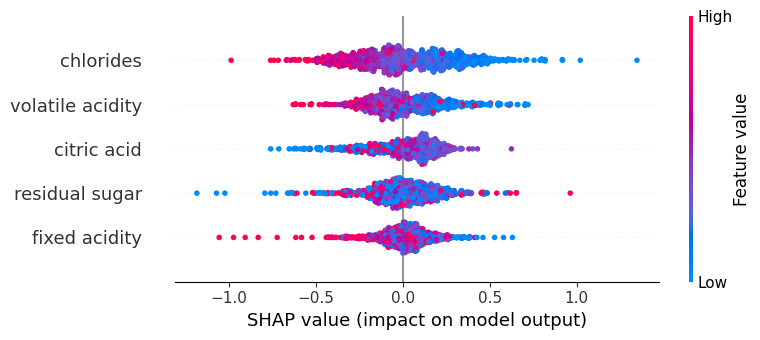

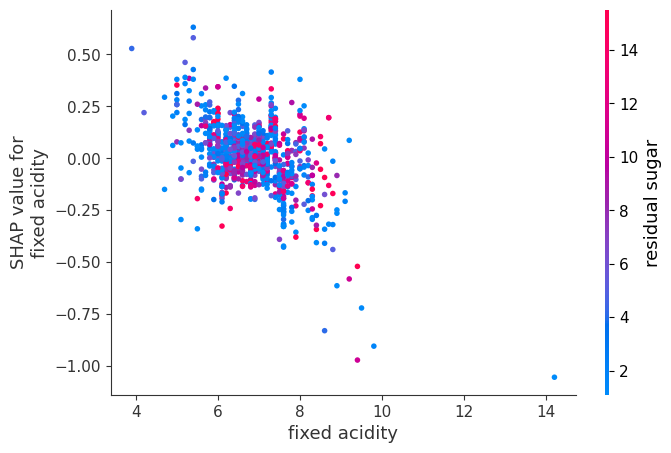

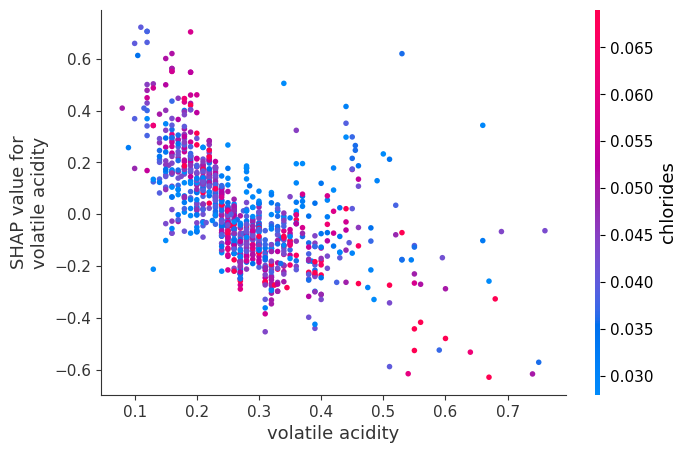

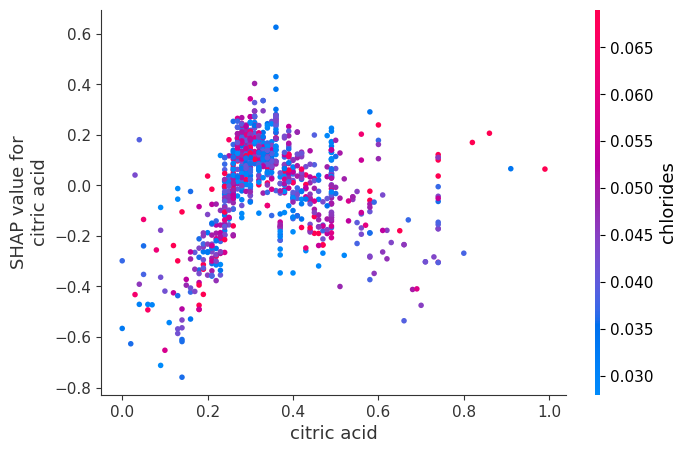

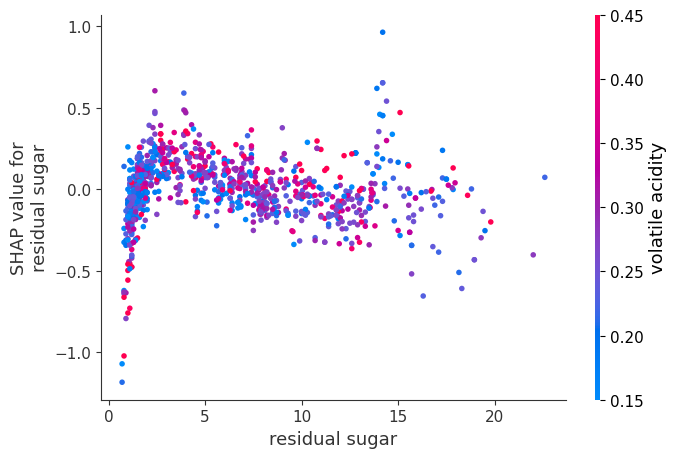

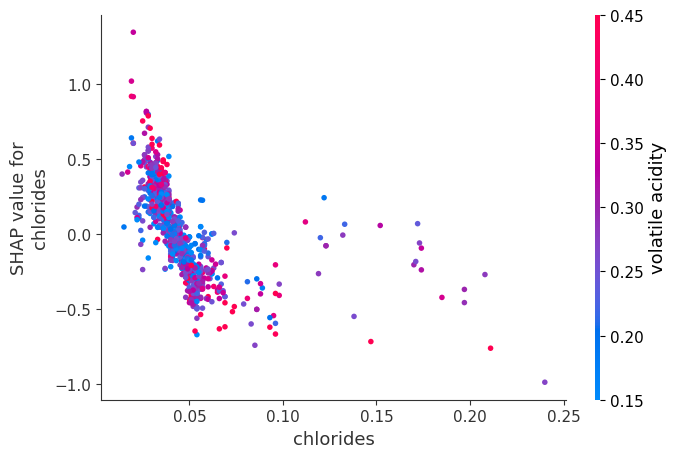

In [18]:
# Plot ringkasan SHAP untuk menunjukkan dampak fitur pada prediksi
shap.summary_plot(shap_values, X_val)

# Membuat plot Partial Dependence menggunakan plot SHAP dependence
for feature in predictors:
    shap.dependence_plot(feature, shap_values, X_val)